# Advanced ML Case Study 6

In [2]:
!pip install imblearn


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

In [4]:
X, y = make_classification(
    n_samples=5000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=2,
    weights=[0.97, 0.03],   # Fraud is rare
    random_state=42
)

df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(20)])
df["target"] = y

print("Dataset Shape:", df.shape)
print(df["target"].value_counts())

Dataset Shape: (5000, 21)
target
0    4825
1     175
Name: count, dtype: int64


## Train-test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("target", axis=1), df["target"],
    test_size=0.2, random_state=42, stratify=df["target"]
)


## SMOTE oversampling


In [6]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_res.value_counts())


After SMOTE: target
0    3860
1    3860
Name: count, dtype: int64


## Feature Scaling

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

## Train Models

In [8]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train_scaled, y_train_res)

rf = RandomForestClassifier(n_estimators=120, random_state=42)
rf.fit(X_train_res, y_train_res)

,n_estimators,120
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Predictions and Evaluation

In [10]:
models = {"Logistic Regression": lr, "Random Forest": rf}

for name, model in models.items():

    print(f"Model: {name}")
    
    y_pred = model.predict(X_test_scaled if name=="Logistic Regression" else X_test)
    
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    y_prob = model.predict_proba(X_test_scaled if name=="Logistic Regression" else X_test)[:,1]
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91       965
           1       0.15      0.77      0.26        35

    accuracy                           0.84      1000
   macro avg       0.57      0.81      0.58      1000
weighted avg       0.96      0.84      0.89      1000

Confusion Matrix:
 [[816 149]
 [  8  27]]
ROC-AUC: 0.8598075499629902
Model: Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.88      0.40      0.55        35

    accuracy                           0.98      1000
   macro avg       0.93      0.70      0.77      1000
weighted avg       0.98      0.98      0.97      1000

Confusion Matrix:
 [[963   2]
 [ 21  14]]
ROC-AUC: 0.9322575869726129


## ROC Curve

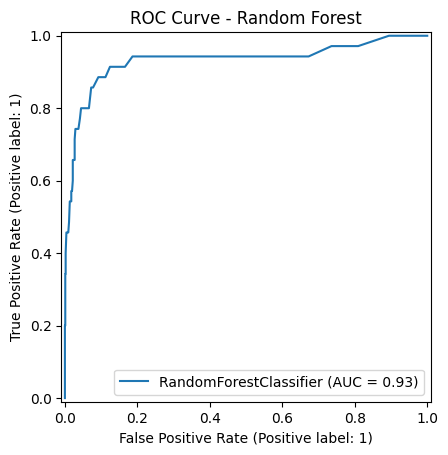

In [11]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()